# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

> In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# read data
df = pd.read_csv("telecom_churn_data.csv")
# view first few rows
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# check datatypes of the columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
# Shape of the dataset - rows x columns
df.shape

(99999, 226)

In [5]:
# display upto two decimal places only
pd.options.display.float_format = '{:.2f}'.format

# statistical summary
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

## Exploratory Data Analysis

**Filter High Value Customers**

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
> Since there are a lot of rows in here, filtering the high value customers and dropping few not-so-important columns to fasten the operations. We are considering the top 30% of the revenue-brewing customers to be high value ones.

In [6]:
## Filter high value customers

# calculate the total data recharge amount for June and July as:  number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

# calculate total recharge amount for June and July as:  call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6.fillna(0) + df.total_data_rech_6.fillna(0)
df['amt_data_7'] = df.total_rech_amt_7.fillna(0) + df.total_data_rech_7.fillna(0)

# calculate average recharge done by customer in June and July
df['avg_amt'] = (df.amt_data_6 + df.amt_data_7)/2

# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.avg_amt.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [7]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df_filtered = df.loc[df.avg_amt >= df.avg_amt.quantile(0.7), :]
df_filtered = df_filtered.reset_index(drop=True)

# # delete variables created to filter high-value customers
df_filtered = df_filtered.drop(['total_data_rech_6', 'total_data_rech_7','amt_data_6', 'amt_data_7', 'avg_amt'], axis=1)
df_filtered.shape

(30001, 226)

**Missing value treatment**

In [8]:
# null values
missing_values = df_filtered.isnull().sum()*100/df.shape[0]

missing_value_df = pd.DataFrame({'column_name': df_filtered.columns,
                                 'percent_missing': missing_values})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)

missing_value_df

,column_name,percent_missing
fb_user_9,fb_user_9,14.78
date_of_last_rech_data_9,date_of_last_rech_data_9,14.78
night_pck_user_9,night_pck_user_9,14.78
arpu_3g_9,arpu_3g_9,14.78
max_rech_data_9,max_rech_data_9,14.78
av_rech_amt_data_9,av_rech_amt_data_9,14.78
arpu_2g_9,arpu_2g_9,14.78
count_rech_2g_9,count_rech_2g_9,14.78
total_rech_data_9,total_rech_data_9,14.78
count_rech_3g_9,count_rech_3g_9,14.78


Since there are many rows with missing values. Dropping these would not be appropriate. It will result in huge loss of data and may add bias to data. In many columns, missing value might actually mean information. Hence, imputing the missing values is preferred.

In columns like 'Recharges' done in a month, a null value probably means that there was no recharge done that month. Hence, imputing the missing values in such columns with zero.

In [9]:
# list of recharge columns where we will impute missing values with zeroes
zero_impute = [ 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

# impute these cols with zero
df_filtered[zero_impute] = df_filtered[zero_impute].apply(lambda x: x.fillna(0))
df_filtered[zero_impute].isnull().sum()*100/df.shape[1]

total_rech_data_6    0.00
total_rech_data_7    0.00
total_rech_data_8    0.00
total_rech_data_9    0.00
av_rech_amt_data_6   0.00
av_rech_amt_data_7   0.00
av_rech_amt_data_8   0.00
av_rech_amt_data_9   0.00
max_rech_data_6      0.00
max_rech_data_7      0.00
max_rech_data_8      0.00
max_rech_data_9      0.00
dtype: float64

If user isn't availing any 'pack' service, there are chances that such data is left unfilled. So, in columns like 'pack' user, the null values are replaced with '-1', indicating 'service not availed'. It is different from the existing category '0' where user has enabled packs but hasn't recharged.

In [10]:
one_impute =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
               'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

# replace missing values with '-1' in categorical columns
df_filtered[one_impute] = df_filtered[one_impute].apply(lambda x: x.fillna(-1))
df_filtered[one_impute].isnull().sum()*100/df_filtered.shape[1]

night_pck_user_6   0.00
night_pck_user_7   0.00
night_pck_user_8   0.00
night_pck_user_9   0.00
fb_user_6          0.00
fb_user_7          0.00
fb_user_8          0.00
fb_user_9          0.00
dtype: float64

The missing values in other numerical columns are imputed using standard 'iterative imputer' package for more efficiency.

In [11]:
cols = df_filtered.columns.tolist()
num_cols = df_filtered.select_dtypes(exclude=['object']).columns.tolist()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Imputer = IterativeImputer(random_state=0)
df_filtered[num_cols] = Imputer.fit_transform(df_filtered[num_cols])

# Missing value percentage after imputation
df_filtered[num_cols].isnull().sum()*100/df_filtered.shape[1]

mobile_number        0.00
circle_id            0.00
loc_og_t2o_mou       0.00
std_og_t2o_mou       0.00
loc_ic_t2o_mou       0.00
arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
arpu_9               0.00
onnet_mou_6          0.00
onnet_mou_7          0.00
onnet_mou_8          0.00
onnet_mou_9          0.00
offnet_mou_6         0.00
offnet_mou_7         0.00
offnet_mou_8         0.00
offnet_mou_9         0.00
roam_ic_mou_6        0.00
roam_ic_mou_7        0.00
roam_ic_mou_8        0.00
roam_ic_mou_9        0.00
roam_og_mou_6        0.00
roam_og_mou_7        0.00
roam_og_mou_8        0.00
roam_og_mou_9        0.00
loc_og_t2t_mou_6     0.00
loc_og_t2t_mou_7     0.00
loc_og_t2t_mou_8     0.00
loc_og_t2t_mou_9     0.00
loc_og_t2m_mou_6     0.00
loc_og_t2m_mou_7     0.00
loc_og_t2m_mou_8     0.00
loc_og_t2m_mou_9     0.00
loc_og_t2f_mou_6     0.00
loc_og_t2f_mou_7     0.00
loc_og_t2f_mou_8     0.00
loc_og_t2f_mou_9     0.00
loc_og_t2c_mou_6     0.00
loc_og_t2c_m

The 'date of last recharge in a month' columns doesn't add any value as such. So, they can be transformed into new columns indicating if any recharge has been done in that month.

In [12]:
# Dropping last date of month columns since they add no new/useful information at all
df_filtered.drop(['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8', 'last_date_of_month_9'], axis=1, inplace=True)

#Transform the existing date of last recharge columns with 1 indicating a recharge and -1 indicating no recharge
ColsToTransform = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

df_filtered[ColsToTransform] = df_filtered[ColsToTransform].applymap(lambda x: -1 if pd.isnull(x) else 1)

#Convert the features to category
df_filtered[ColsToTransform] = df_filtered[ColsToTransform].apply(lambda x: x.astype('category'))
# Rename the columns
df_filtered.rename(columns={'date_of_last_rech_6':'Recharge_6','date_of_last_rech_7':'Recharge_7','date_of_last_rech_8':'Recharge_8',
                           'date_of_last_rech_data_6':'Data_Recharge_6','date_of_last_rech_data_7':'Data_Recharge_7','date_of_last_rech_data_8':'Data_Recharge_8'}, inplace=True)

In [13]:
# Checking null values
missing_values = df_filtered.isnull().sum()*100/df.shape[0]
missing_value_df = pd.DataFrame({'column_name': df_filtered.columns,
                                 'percent_missing': missing_values})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
date_of_last_rech_data_9,date_of_last_rech_data_9,14.78
date_of_last_rech_9,date_of_last_rech_9,0.82
mobile_number,mobile_number,0.00
last_day_rch_amt_9,last_day_rch_amt_9,0.00
max_rech_amt_6,max_rech_amt_6,0.00
max_rech_amt_7,max_rech_amt_7,0.00
max_rech_amt_8,max_rech_amt_8,0.00
max_rech_amt_9,max_rech_amt_9,0.00
Recharge_6,Recharge_6,0.00
Recharge_7,Recharge_7,0.00


It can be seen that there are some columns with missing values yet. All these belong to the 9th month. These will be dropped later as it belongs to the action month. However, prior to that, we need to derive the target variable.

## Derive target variable - churn or not

There are various ways to define churn, such as:<br>
    > Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time.<br>
    > Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.<br>
In this project, we will use the usage-based definition to define churn.

> create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
0 - not churn, 1 - churn

In [14]:
df_filtered['churn'] = df_filtered[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].apply(lambda row: 1 if ((row.total_ic_mou_9 + row.total_og_mou_9 == 0) and (row.vol_2g_mb_9 + row.vol_3g_mb_9 == 0)) else 0, axis=1)

# print churn ratio
print("Churn Ratio:")
print(df_filtered.churn.value_counts()*100/df_filtered.shape[0])

Churn Ratio:
0   91.86
1    8.14
Name: churn, dtype: float64


In [15]:
import cutecharts.charts as ctc

chart = ctc.Pie('Churn vs No churn',width='500px',height='500px')

chart.set_options(
     labels=['No churn', 'churn'],
     inner_radius= 0
 )

chart.add_series(list(df_filtered['churn'].value_counts()*100.0 /df_filtered.shape[0]))
chart.render_notebook()

#### Data Wrangling

In [16]:
# delete all variables relating to 9th month as it is the action month
df_filtered = df_filtered.filter(regex='[^9]$', axis=1)

In [17]:
#Get the statistical summary of all numeric columns
df_filtered.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00
mean,7001206159.56,109.00,0.00,0.00,0.00,558.49,560.78,508.60,259.45,267.03,231.38,380.23,384.46,347.89,17.20,13.47,15.18,26.98,20.36,20.51,85.50,86.34,7

Mobile number of a customer has no productive information while columns like 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7','std_ic_t2o_mou_8' has no variance at all. Hence dropping these columns.

In [18]:
#Drop the columns
df_filtered = df_filtered.drop(['mobile_number','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                     'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6',
                     'std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1)
df_filtered.shape

(30001, 159)

'Age on network' variable makes more sense when expressed in months as against days.

In [19]:
#Convert AON in Months
df_filtered['aon_mon'] = df_filtered['aon']/30
df_filtered.drop('aon', axis=1, inplace=True)
df_filtered['aon_mon'].head()

0   32.27
1   26.73
2   10.50
3   24.00
4   20.13
Name: aon_mon, dtype: float64

### UNIVARIATE AND BIVARIATE ANALYSIS

In [20]:
df_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 159 columns):
 #   Column              Dtype   
---  ------              -----   
 0   arpu_6              float64 
 1   arpu_7              float64 
 2   arpu_8              float64 
 3   onnet_mou_6         float64 
 4   onnet_mou_7         float64 
 5   onnet_mou_8         float64 
 6   offnet_mou_6        float64 
 7   offnet_mou_7        float64 
 8   offnet_mou_8        float64 
 9   roam_ic_mou_6       float64 
 10  roam_ic_mou_7       float64 
 11  roam_ic_mou_8       float64 
 12  roam_og_mou_6       float64 
 13  roam_og_mou_7       float64 
 14  roam_og_mou_8       float64 
 15  loc_og_t2t_mou_6    float64 
 16  loc_og_t2t_mou_7    float64 
 17  loc_og_t2t_mou_8    float64 
 18  loc_og_t2m_mou_6    float64 
 19  loc_og_t2m_mou_7    float64 
 20  loc_og_t2m_mou_8    float64 
 21  loc_og_t2f_mou_6    float64 
 22  loc_og_t2f_mou_7    float64 
 23  loc_og_t2f_mou_8    float64 
 24  l

In [21]:
num_cols = df_filtered.select_dtypes(exclude=['object','category']).columns.tolist()
cat_cols = df_filtered.select_dtypes(include=['category']).columns.tolist()

**Categorical Columns**

In [22]:
# Custom function to plot univariate analysis - categorical variables
def plot_categorical(feature):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,8), constrained_layout=True)
    
    s = sns.countplot(ax=ax1, x = feature ,hue='churn', data=df_filtered)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    ax1.title.set_text('{0}-Count Plot'.format(feature))
    
    prcnt_df1 = df_filtered[[feature, 'churn']].groupby([feature],as_index=False).mean() #calculates percentage of target 1
    prcnt_df1.sort_values(by='churn', ascending=False, inplace=True)
    s = sns.barplot(ax=ax2, x=feature, y='churn', hue='churn', data = prcnt_df1, order=prcnt_df1[feature]) 
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    ax2.title.set_text('Percentage of values - Target 1')
    
    plt.title(attr)
    plt.show()

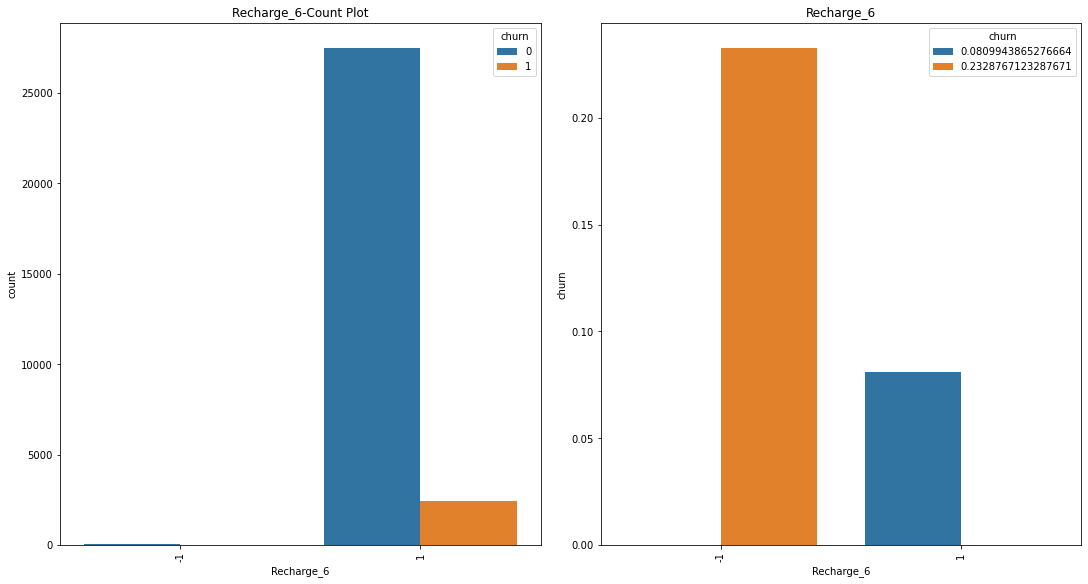

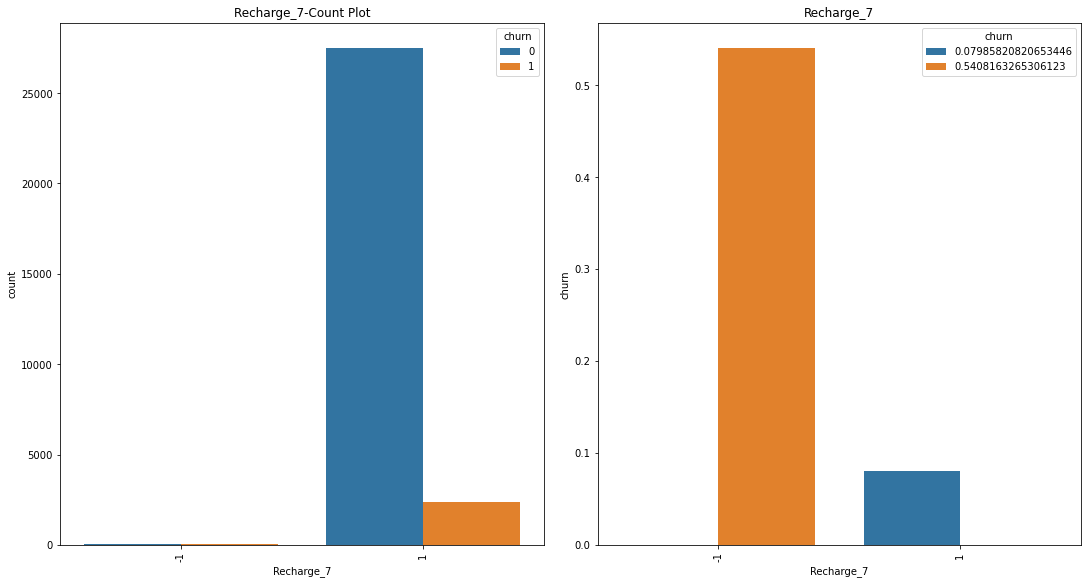

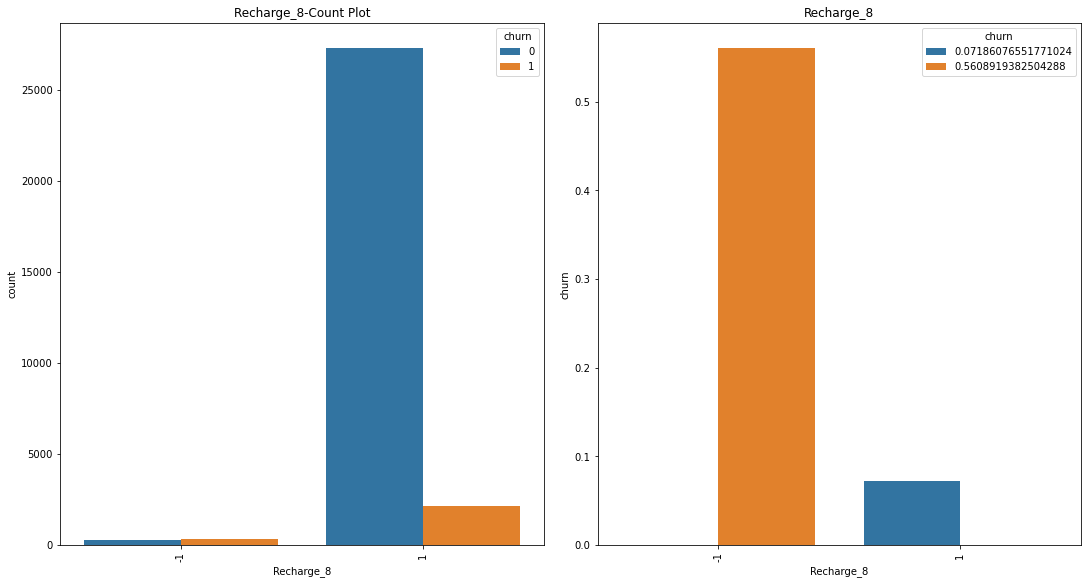

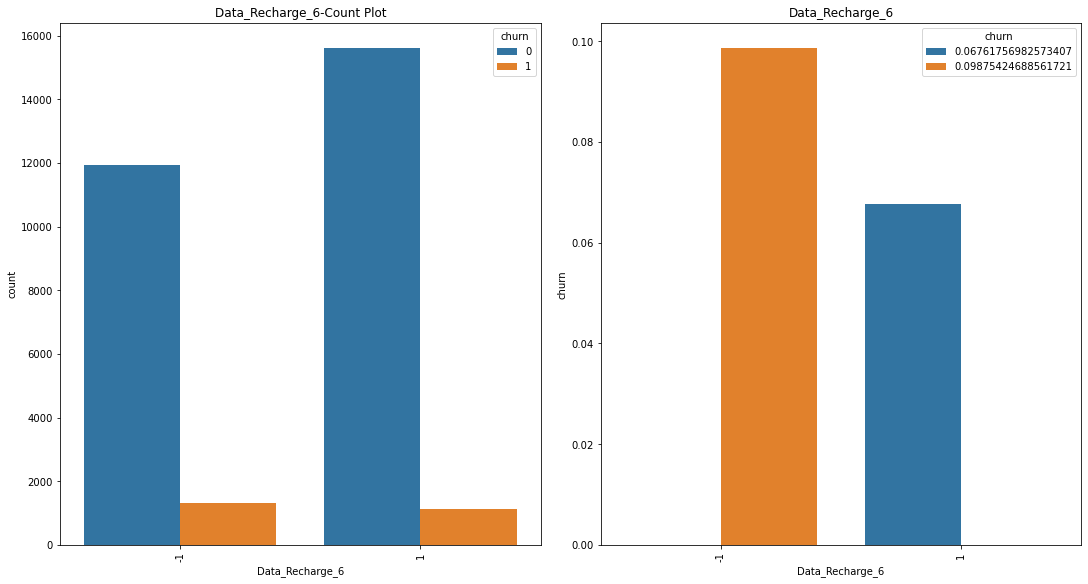

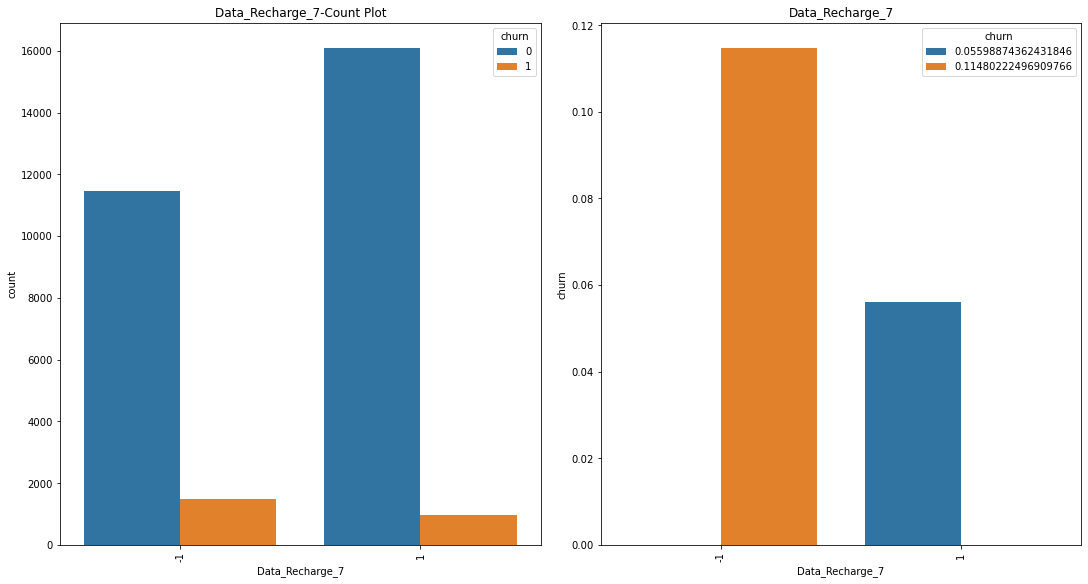

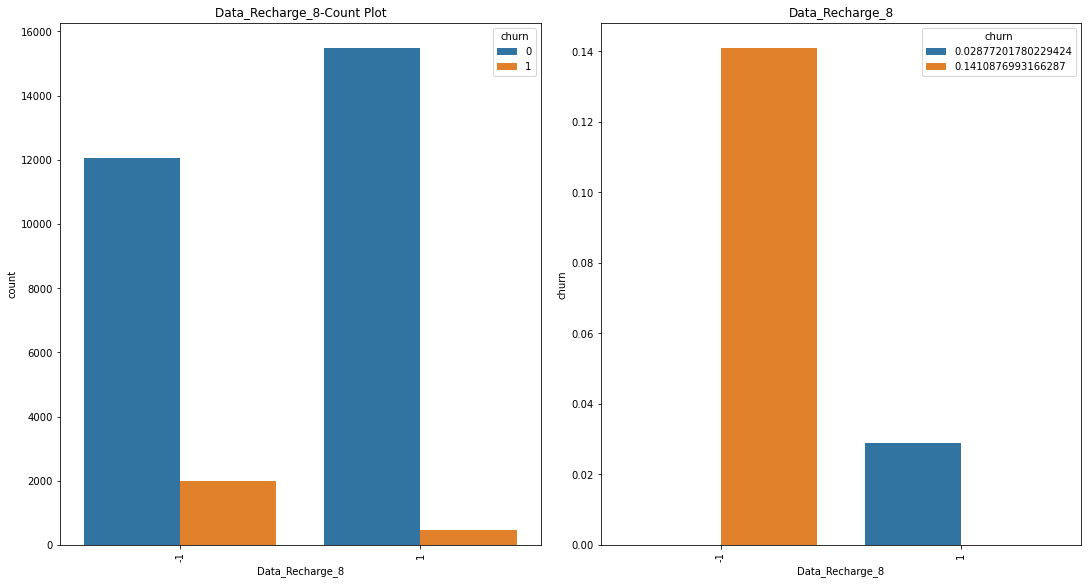

In [23]:
for attr in cat_cols:
  plot_categorical(attr);

It can be seen that whenever the customer is about to churn, the total recharges done by them start to dwindle. It is a clear sign of churn ahead.

#### Numerical cols

**Average revenue per user**

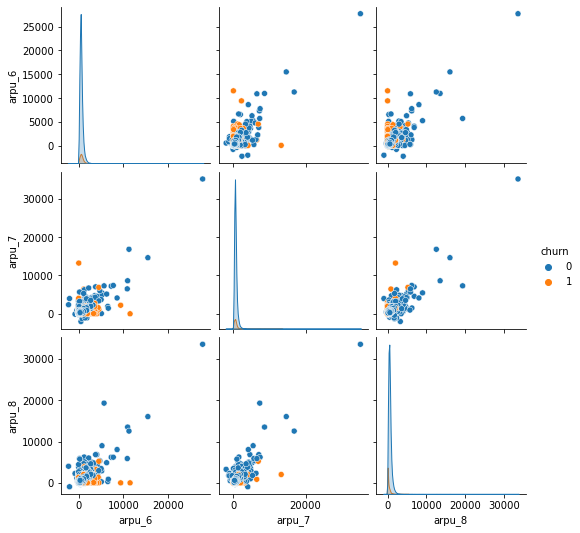

In [24]:
sns.pairplot(data=df_filtered[['churn','arpu_6','arpu_7','arpu_8']],hue='churn');

Average revenue per user plummets rapidly as the months progresses in cases where churn occurs.

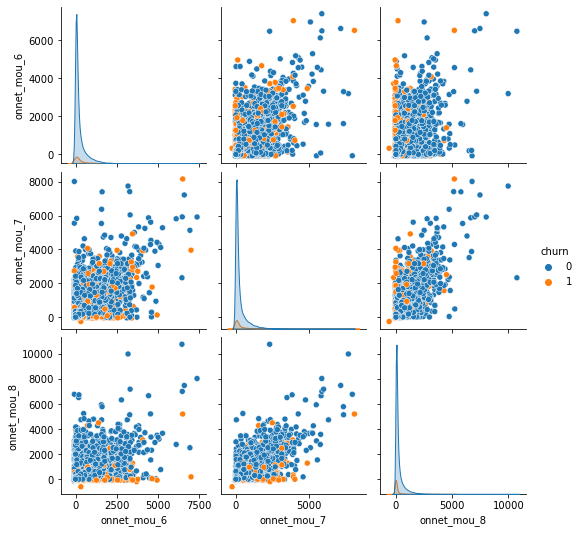

In [25]:
sns.pairplot(data=df_filtered[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn');

Surprisingly, the total minutes on net calls increased rapidly when customers were about to churn. Probably, a case of user wanting to use up any data/balance left.

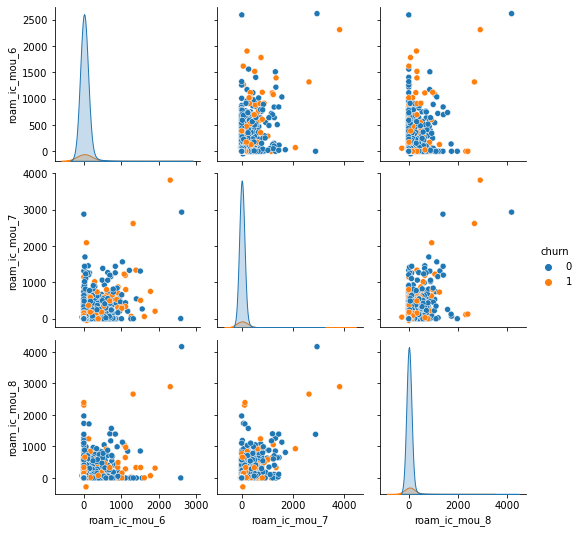

In [26]:
sns.pairplot(data=df_filtered[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']],hue='churn',diag_kws=dict(bw=1.5));

Roaming calls also follow the same pattern as On net calls.

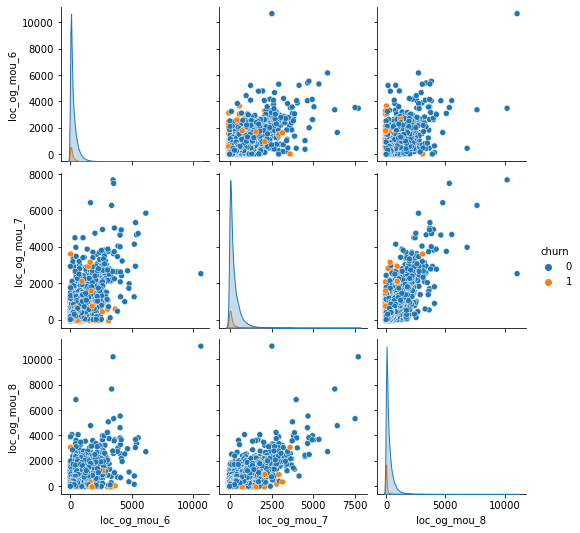

In [27]:
sns.pairplot(data=df_filtered[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn');

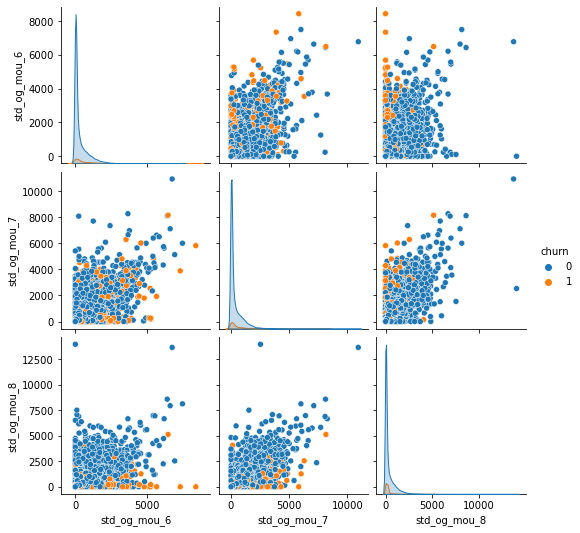

In [28]:
sns.pairplot(data=df_filtered[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn');

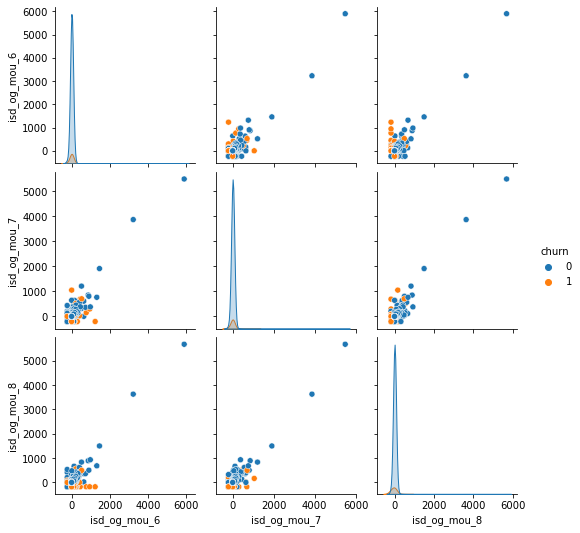

In [29]:
sns.pairplot(data=df_filtered[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn',diag_kws=dict(bw=1.5));

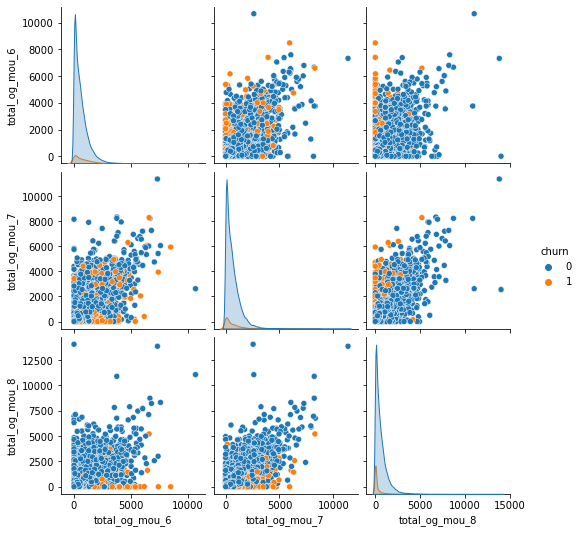

In [30]:
sns.pairplot(data=df_filtered[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn');

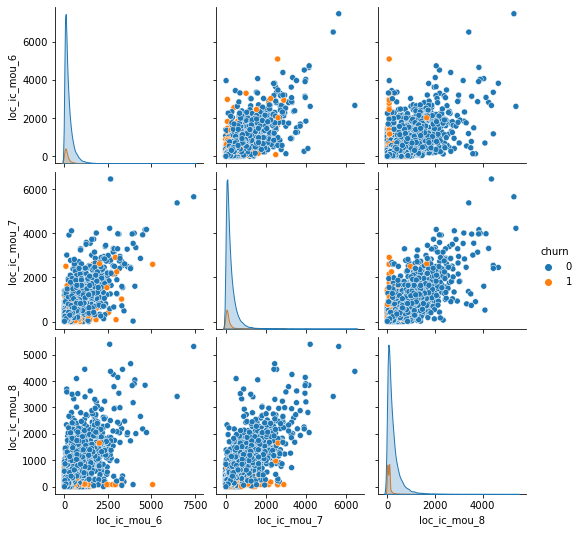

In [31]:
sns.pairplot(data=df_filtered[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn');

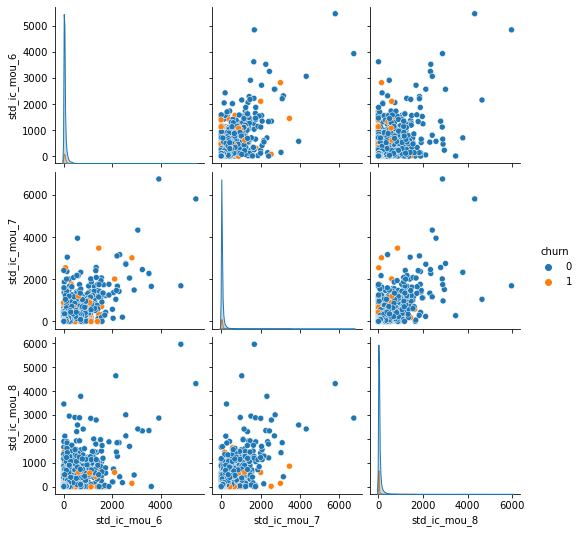

In [32]:
sns.pairplot(data=df_filtered[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']],hue='churn');

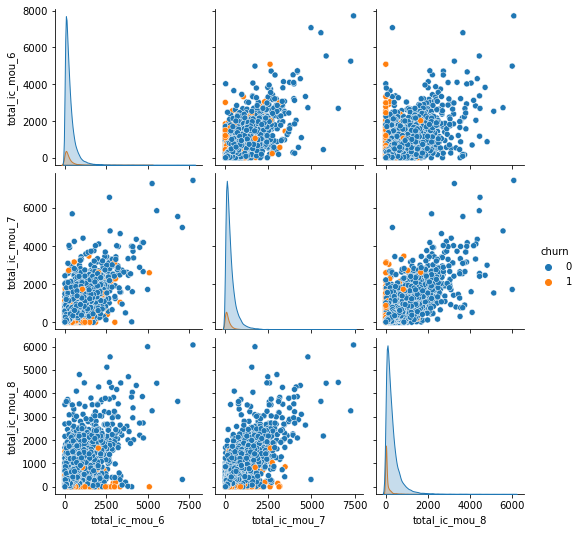

In [33]:
sns.pairplot(data=df_filtered[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']],hue='churn');

From all the above plots, it is clear that customers who are about to churn stop doing any recharges (i.e. no additional revenue) some time prior to the actual churn. However, the usage of the current network increases. They tend to use every money spent on the current network before they switch.

**Correlation of features with churn**

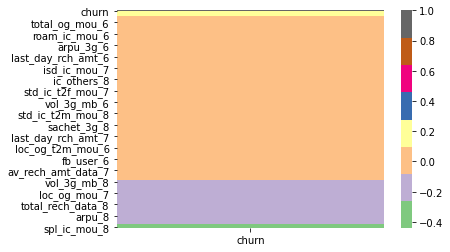

In [34]:
sns.heatmap(df_filtered.corr()[['churn']].sort_values(by='churn', ascending=False), cmap='Accent')

> The trend is pretty obvious : 'Recharges start drying up, minutes per call and number of calls shoots up'. <br>
Customers want to make best use of the remaining services in their account. <br>
Interestingly, data usage is negatively correlated with churn. That is to say, Customers who use the data services are less likely to churn.

## Feature Engineering

It can be seen that there are many variables representing the same basic unit over few months. It would be more useful to see the surge or fall in these variables in the action month(8th month) as against the average of the 6th and 7th months.

In [35]:
def surge_or_fall(col):
    col_output = pd.Series(df_filtered[col+'8'] - (df_filtered[col+'6'] + df_filtered[col+'7'])/2, index=df_filtered.index)
    return col_output

In [36]:
ColsToTransform = ['arpu_','onnet_mou_','offnet_mou_','roam_ic_mou_','roam_og_mou_'
                   ,'loc_og_mou_','std_og_mou_','isd_og_mou_','spl_og_mou_','total_og_mou_'
                   ,'loc_ic_mou_','std_ic_mou_','isd_ic_mou_','spl_ic_mou_','total_ic_mou_'
                   ,'total_rech_num_','total_rech_amt_','max_rech_amt_','total_rech_data_'
                   ,'max_rech_data_','av_rech_amt_data_','vol_2g_mb_','vol_3g_mb_']
for col in ColsToTransform:
    df_filtered[col+'diff'] = surge_or_fall(col)

In [37]:
bins = [0, 3, 6, 9, 12, 24, 36, 48, 60, 61]
labels = [ '0-3','3-6', '6-9','9-12', '1-2', '2-3','3-4','4-5','5 and above']
df_filtered['tenure'] = pd.cut(df_filtered['aon_mon'], bins, labels=labels)

Text(0.5, 0, 'Age of customer')

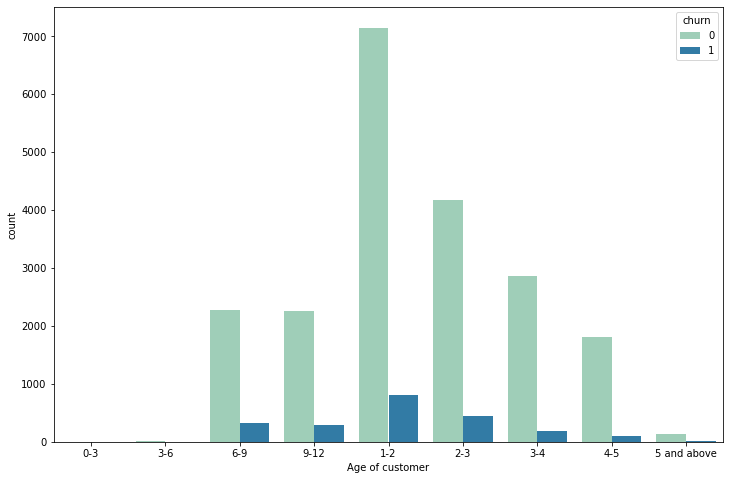

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x="tenure", data=df_filtered, palette="YlGnBu", hue = "churn");
plt.xlabel("Age of customer")

The chances to churn follows a normal distribution based on the age of the customer. Customers are less likely to churn in the first few months as well after 3 years. Customers 1-3 years with the company shows highest tendency to churn.

## Data Preparation

In [39]:
df_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 183 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   arpu_6                 float64 
 1   arpu_7                 float64 
 2   arpu_8                 float64 
 3   onnet_mou_6            float64 
 4   onnet_mou_7            float64 
 5   onnet_mou_8            float64 
 6   offnet_mou_6           float64 
 7   offnet_mou_7           float64 
 8   offnet_mou_8           float64 
 9   roam_ic_mou_6          float64 
 10  roam_ic_mou_7          float64 
 11  roam_ic_mou_8          float64 
 12  roam_og_mou_6          float64 
 13  roam_og_mou_7          float64 
 14  roam_og_mou_8          float64 
 15  loc_og_t2t_mou_6       float64 
 16  loc_og_t2t_mou_7       float64 
 17  loc_og_t2t_mou_8       float64 
 18  loc_og_t2m_mou_6       float64 
 19  loc_og_t2m_mou_7       float64 
 20  loc_og_t2m_mou_8       float64 
 21  loc_og_t2f_mou_6       float64 
 2

**Outlier Treatment**

Just capping the outliers at 99th percentile. Since we are to use RobustScaler later which is efficient in handling outliers, we leave outlier treatment at that.

In [40]:
# change data type to category
df_filtered.churn = df_filtered.churn.astype("category")
num_cols = df_filtered.select_dtypes(exclude=['object','category']).columns.tolist()

# Outlier Treatment
for col in num_cols:
    bounds = df_filtered[col].quantile([0.001,0.999]).values
    df_filtered[col] = np.clip(df_filtered[col],bounds[0],bounds[1])

**Train-Test Split**

In [41]:
# Train test split
X = df_filtered.drop(['churn','tenure'],axis=1)
y = df_filtered['churn']

# Partition the dataset in train + validation sets
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)


print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (21000, 181)
Training dataset target size (21000,)
Test dataset size (9001, 181)
Test dataset target size (9001,)


**Scaling** <br>
Using Robust scaler since it handles outliers like a pro.

In [42]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

#Create new scaled df
import copy
X_train_scaled = copy.deepcopy(X_train)
X_test_scaled = copy.deepcopy(X_test)

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test_scaled)

**Treat Data Imbalance**

In [43]:
### Data Imbalance

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

Imbalance in Train Data :  0.08757574188202392
Imbalance in Test Data :  0.09089807296085323


Clearly the dataset is highly imbalanced,  most of the data points represent cases where users did not churn. This curbs the ability of the models to learn about the more important case where users churn. Hence, we try to balance the dataset by minority over-sampling. Using SMOTE package for the same.

In [44]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=29)
X_tr,y_tr = sm.fit_sample(X_train_scaled,y_train.ravel())

# After Balancing
print("X_tr Shape", X_tr.shape)
print("y_tr Shape", y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

X_tr Shape (38618, 181)
y_tr Shape (38618,)
Imbalance in Train Data :  1.0


## MODEL BUILDING

We will be building five models - logistic regression with and without pca, decision tree, random forests and a voting classifier ensemble. From the five, we will select two models, one to understand drivers behind churn and one to predict churn efficiently.

In [45]:
# Function to print confusion matrix
def printCM(actual,pred):
    cm = confusion_matrix(actual,pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(actual), index = np.unique(actual))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm


# Function to plot confusion matrix
def cMatrix(actual,pred):
    cm = confusion_matrix(actual,pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(actual), index = np.unique(actual))
    
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    sns.set(font_scale=1.4)

    groups= ['TN','FP','FN','TP']
    counts = ['{0:0.0f}'.format(val) for val in cm.flatten()]
    percentages = ["{0:.2%}".format(val) for val in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(groups,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(df_cm, cmap="Blues", annot=labels, annot_kws={"size": 16}, fmt='');

### MODEL-1 LOGISTIC REGRESSION WITHOUT PCA

In [46]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score, plot_roc_curve, auc, roc_curve

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
logs_reg = LogisticRegression()

logs_reg.fit(X_tr, y_tr)

LogisticRegression()

In [48]:
# Predicted probabilities
y_pred = logs_reg.predict(X_tr)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [49]:
print("LogisticRegression training accuracy without PCA: ",accuracy_score(y_tr,y_pred))

printCM(y_tr,y_pred)

LogisticRegression training accuracy without PCA:  0.8346108032523694


Predicted,0,1
Actual,,
0,16196,3113
1,3274,16035


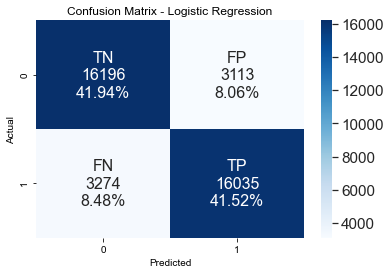

In [50]:
plt.title('Confusion Matrix - Logistic Regression')
cMatrix(y_tr,y_pred)

In [51]:
# Predicted probabilities
y_pred_test = logs_reg.predict(X_test_scaled)
# Converting y_pred to a dataframe which is an array
y_tstpred_df = pd.DataFrame(y_pred_test)

print("LogisticRegression accuracy without PCA: ",accuracy_score(y_test,y_pred_test))

LogisticRegression accuracy without PCA:  0.8484612820797689


In [52]:
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    no churn       0.97      0.86      0.91      8251
       churn       0.32      0.74      0.45       750

    accuracy                           0.85      9001
   macro avg       0.65      0.80      0.68      9001
weighted avg       0.92      0.85      0.87      9001



Sensitivity: 	0.74
Specificity: 	0.86


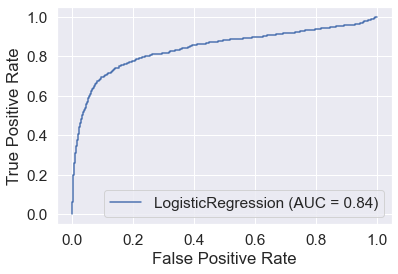

In [53]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_test, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plot_roc_curve(logs_reg, X_test_scaled, y_test);

> As seen above, when applied on the data-sans-PCA, logistic regression (default) achieves an accuracy of 83% on the training set and a similar 85% on the test set.

Now lets try the same using rfe

Optimal number of features : 155


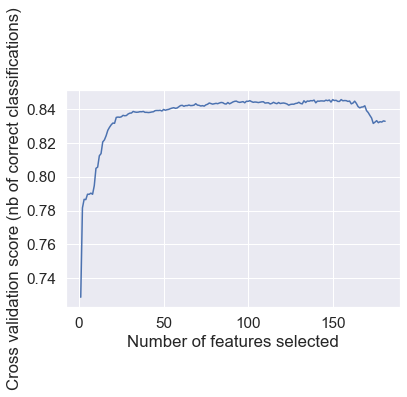

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

logreg2 = LogisticRegression()
rfecv = RFECV(estimator=logreg2, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X_tr, y_tr)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure();
plt.xlabel("Number of features selected");
plt.ylabel("Cross validation score (nb of correct classifications)");
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);
plt.show();

The cross-validation score levels around 30 parameters. It slowly creeps up with optimal value at 142 variables. Lets check the statistical significance of the optimal model.

In [55]:
X_tr2 = pd.DataFrame(X_tr, columns=X_train.columns)
# list(zip(X_train.columns, rfecv.support_, rfecv.ranking_))
col = X_tr2.columns[rfecv.support_]

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_tr2[col])
logm2 = sm.GLM(y_tr,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38462
Model Family:                Binomial   Df Model:                          155
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13530.
Date:                Sat, 19 Jun 2021   Deviance:                       27061.
Time:                        11:25:35   Pearson chi2:                 1.19e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.9022      0.450     -2.005      0.045      -1.784      -0.020
arpu_6                   -0.4448      0.181     -2.463      0.014      -0.799      -0.091
arpu_7                   -0.2031      0.185     -1.100      0.271      -0.565       0.159
arpu_8                    1.9305      0.383      5.040      0.000       1.180       2.681
onnet_mou_6              -0.3330      0.112     -2.985      0.003      -0.552      -0.114
onnet_mou_7              -0.1200      0.267     -0.450      0.653      -0.643       0.403
offnet_mou_6              0.5508      0.236      2.334      0.020       0.088       1.013
offnet_mou_7             -1.0404      0.512     -2.032      0.042      -2.044      -0.037
offnet_mou_8             -0.6518      0.397     -1.640      0.101      -1.431       0.127
roam_ic_mou_6             0.0006      0.001      0.734      0.463      -0.001       0.002
roam_ic_mou_7             0.0029      0.001      3.511      0.000       0.001       0.004
roam_ic_mou_8            -0.0019      0.001     -1.445      0.148      -0.005       0.001
roam_og_mou_7             0.0046      0.001      4.221      0.000       0.002       0.007
loc_og_t2t_mou_6         -0.0087      0.115     -0.076      0.940      -0.235       0.217
loc_og_t2t_mou_7         -0.2128      0.096     -2.206      0.027      -0.402      -0.024
loc_og_t2t_mou_8         -0.0810      0.249     -0.325      0.745      -0.569       0.407
loc_og_t2m_mou_6         -0.5313      0.285     -1.862      0.063      -1.091       0.028
loc_og_t2m_mou_7         -0.2583      0.223     -1.157      0.247      -0.696       0.179
loc_og_t2m_mou_8         -0.1195      0.659     -0.181      0.856      -1.411       1.172
loc_og_t2f_mou_6         -0.0223      0.014     -1.603      0.109      -0.049       0.005
loc_og_t2f_mou_7         -0.0434      0.014     -3.028      0.002      -0.072      -0.015
loc_og_t2f_mou_8          0.0326      0.024      1.353      0.176      -0.015       0.080
loc_og_t2c_mou_6         -0.0202      0.004     -5.363      0.000      -0.028      -0.013
loc_og_mou_6             -0.0528      0.667     -0.079      0.937      -1.360       1.255
loc_og_mou_7              1.5731      0.489      3.216      0.001       0.614       2.532
loc_og_mou_8              0.4619      1.143      0.404      0.686      -1.779       2.703
std_og_t2t_mou_6          0.0919      0.110      0.839      0.402      -0.123       0.307
std_og_t2t_mou_7         -0.1617      0.170     -0.950      0.342      -0.495       0.172
std_og_t2t_mou_8         -0.0913      0.098     -0.928      0.353      -0.284       0.102
std_og_t2m_mou_6         -0.2921      0.153     -1.909      0.056      -0.592       0.008
std_og_t2m_mou_7          0.3320      0.239      1.387      0.166      -0.137       0.801
std_og_t2m_mou_8       

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = X_tr2[col].columns
vif['VIF'] = [variance_inflation_factor(X_tr2[col].values, i) for i in range(X_tr2[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
71,spl_ic_mou_8,126023.69
146,spl_ic_mou_diff,96309.25
95,count_rech_2g_8,11719.21
119,sachet_2g_8,10852.91
70,spl_ic_mou_7,9798.26
69,spl_ic_mou_6,8395.30
93,count_rech_2g_6,6733.68
118,sachet_2g_6,5909.45
34,std_og_mou_7,2270.59
33,std_og_mou_6,1804.47


Clearly there are many variables in there which have little-to-no statistical significance. There is high multi-collinearity as well. Probably, the model will perform better after some fine-tuning.

## Model 2- Logistic Regression with PCA

In [57]:
# Importing PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)

#Doing the PCA on the train data
pca.fit(X_tr)

X_train_pca = pca.fit_transform(X_tr)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test_scaled)
print(X_test_pca.shape)

(38618, 181)
(9001, 181)


In [58]:
logpca = LogisticRegression()
logpca.fit(X_train_pca,y_tr)

LogisticRegression()

In [59]:
# Predicted probabilities
y_pred2 = logpca.predict(X_train_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred2)

print("LogisticRegression training accuracy with PCA: ",accuracy_score(y_tr,y_pred2))

printCM(y_tr,y_pred2)

LogisticRegression training accuracy with PCA:  0.8385726863120825


Predicted,0,1
Actual,,
0,15998,3311
1,2923,16386


In [60]:
# Predicted probabilities
y_pred_test2 = logpca.predict(X_test_pca)
# Converting y_pred to a dataframe which is an array
y_tstpred_df2 = pd.DataFrame(y_pred_test2)

print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred_test2))

LogisticRegression accuracy with PCA:  0.7426952560826575


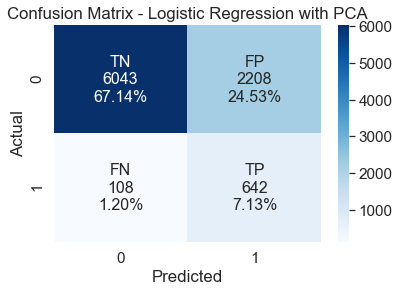

In [61]:
plt.title('Confusion Matrix - Logistic Regression with PCA')
cMatrix(y_test,y_pred_test2)

In [62]:
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred_test2, target_names=target_names))

              precision    recall  f1-score   support

    no churn       0.98      0.73      0.84      8251
       churn       0.23      0.86      0.36       750

    accuracy                           0.74      9001
   macro avg       0.60      0.79      0.60      9001
weighted avg       0.92      0.74      0.80      9001



Sensitivity: 	0.86
Specificity: 	0.73


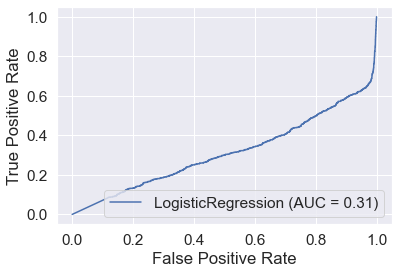

In [63]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_test2, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test2)
roc_auc = auc(fpr, tpr)

plot_roc_curve(logpca, X_test_scaled, y_test);

> Logistic Regression with default PCA achieves accuracy score of 84% on train set and 74% on test set. The recall, area-under-ROC curve and most of the metrics have dismal values on the test set.

#### Applying Incremental PCA

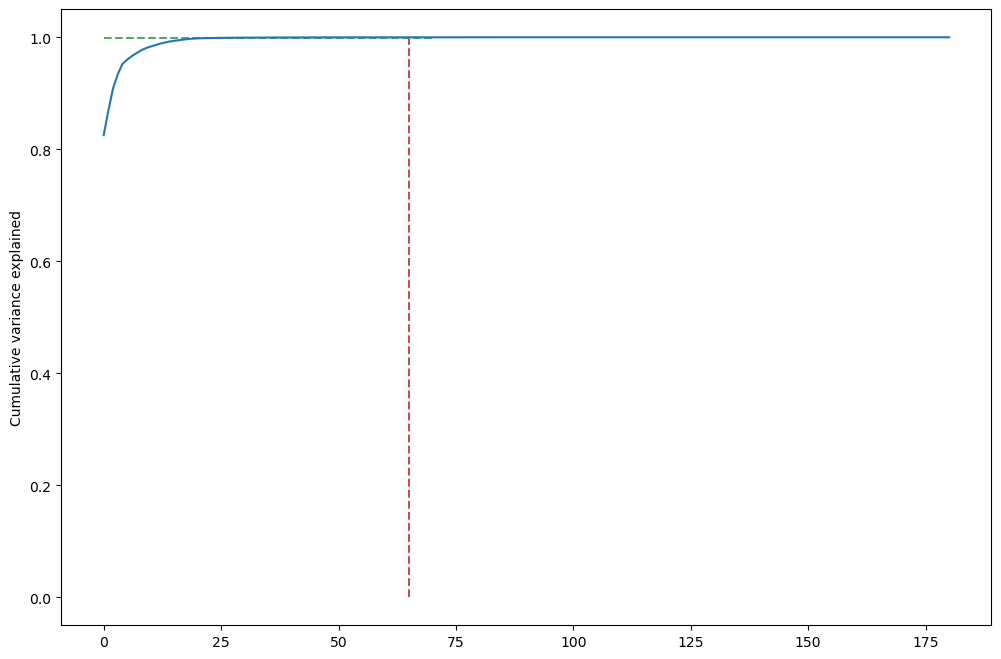

In [168]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Lets see the distibutions of columns in PCA in 2d space
fig = plt.figure(figsize=[12,8]);
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--");
plt.hlines(y=0.999, xmax=70, xmin=0, colors="g", linestyles="--");
plt.plot(var_cumu);
plt.ylabel("Cumulative variance explained");
plt.show();

At around 70 components, the PCA's can explain over 99% of variance in the actual data.

In [65]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA
pca70 = IncrementalPCA(n_components=70)

In [66]:
X_train_pca2 = pca70.fit_transform(X_tr)
print(X_train_pca2.shape)

X_test_pca2 = pca70.transform(X_test_scaled)
print(X_test_pca2.shape)

(38618, 70)
(9001, 70)


In [67]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(X_train_pca2, y_tr)

# Predicted probabilities
y_pred21 = logsk1.predict(X_train_pca2)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred21)

print("LogisticRegression training accuracy with PCA: ",accuracy_score(y_tr,y_pred21))

printCM(y_tr,y_pred21)

LogisticRegression training accuracy with PCA:  0.8360350095810244


Predicted,0,1
Actual,,
0,16425,2884
1,3448,15861


In [68]:
# Predicted probabilities
y_pred_test3 = logsk1.predict(X_test_pca2)
# Converting y_pred to a dataframe which is an array
y_tstpred_df3 = pd.DataFrame(y_pred_test3)

print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred_test3))

LogisticRegression accuracy with PCA:  0.8576824797244751


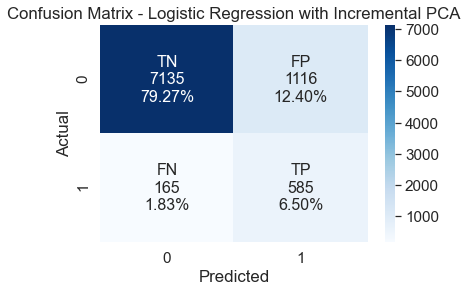

In [69]:
plt.title('Confusion Matrix - Logistic Regression with Incremental PCA')
cMatrix(y_test,y_pred_test3)

In [70]:
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred_test3, target_names=target_names))

              precision    recall  f1-score   support

    no churn       0.98      0.86      0.92      8251
       churn       0.34      0.78      0.48       750

    accuracy                           0.86      9001
   macro avg       0.66      0.82      0.70      9001
weighted avg       0.92      0.86      0.88      9001



Sensitivity: 	0.78
Specificity: 	0.86


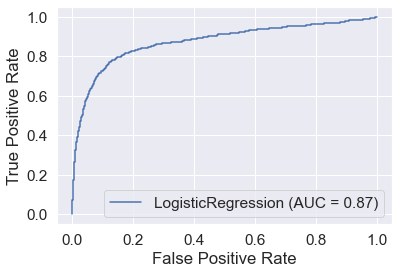

In [71]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_test3, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test3)
roc_auc = auc(fpr, tpr)

plot_roc_curve(logsk1, X_test_pca2, y_test);

> Post parameter tuning, Logistic regression achieves an accuracy of 84% on train set and 86% on test set. The recall value for churn cases (78%) is pretty good. However, the precision in predicting churn is way below par (34%).

## Model 3- Decision Tree

In [72]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [73]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, param_grid, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_train_pca2, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 25, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, scoring='accuracy')

In [74]:
#save best model
dtree_best = tree.best_estimator_

#check best n_estimators value
print(tree.best_params_)

# accuracy score
print('Accuracy Score for Decision Tree Training Model :',tree.best_score_ )
print('Accuracy Score for Decision Tree Test Model :',dtree_best.score(X_test_pca2,y_test))

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 25, 'min_samples_split': 50}
Accuracy Score for Decision Tree Training Model : 0.854834714925046
Accuracy Score for Decision Tree Test Model : 0.8481279857793579


In [75]:
# Making predictions
X_test_pca2 = pd.DataFrame(data=X_test_pca2)
y_pred_test4 = dtree_best.predict(X_test_pca2)

printCM(y_test,y_pred_test4)

Predicted,0,1
Actual,,
0,7361,890
1,477,273


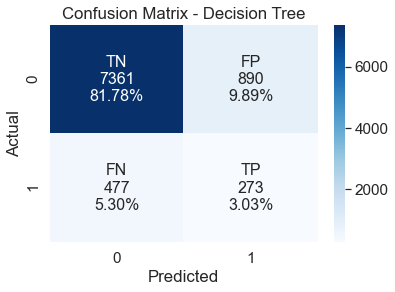

In [76]:
plt.title('Confusion Matrix - Decision Tree')
cMatrix(y_test,y_pred_test4)

In [77]:
# Metrics
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred_test4, target_names=target_names))

              precision    recall  f1-score   support

    no churn       0.94      0.89      0.92      8251
       churn       0.23      0.36      0.29       750

    accuracy                           0.85      9001
   macro avg       0.59      0.63      0.60      9001
weighted avg       0.88      0.85      0.86      9001



Sensitivity: 	0.36
Specificity: 	0.89


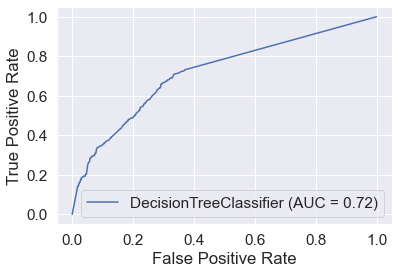

In [78]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_test4, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test4)
roc_auc = auc(fpr, tpr)

plot_roc_curve(dtree_best, X_test_pca2, y_test);

> Surprisingly, Decision tree model performs as good as or worse than the regression models. No metric has values worth a mention.

**Decision Tree using the raw training sets-sans any treatment**

In [79]:
dtree_raw = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
dtree_raw.fit(X_train, y_train)
# accuracy score training
print ('Accuracy Score for Decision Tree training Model :',dtree_raw.score(X_train, y_train))
# accuracy score test
print ('Accuracy Score for Decision Tree Final Model :',dtree_raw.score(X_test,y_test))

Accuracy Score for Decision Tree training Model : 0.9467142857142857
Accuracy Score for Decision Tree Final Model : 0.940451060993223


In [80]:
# Making predictions
y_pred_test33 = dtree_raw.predict(X_test)

printCM(y_test,y_pred_test33)

Predicted,0,1
Actual,,
0,8112,139
1,397,353


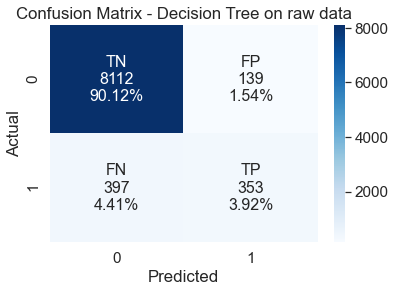

In [81]:
plt.title('Confusion Matrix - Decision Tree on raw data')
cMatrix(y_test,y_pred_test33)

In [82]:
# Metrics
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred_test33, target_names=target_names))

              precision    recall  f1-score   support

    no churn       0.95      0.98      0.97      8251
       churn       0.72      0.47      0.57       750

    accuracy                           0.94      9001
   macro avg       0.84      0.73      0.77      9001
weighted avg       0.93      0.94      0.93      9001



Sensitivity: 	0.47
Specificity: 	0.98


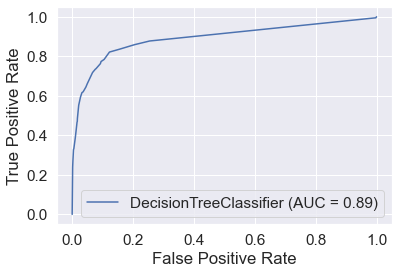

In [83]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_test33, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


# check area under curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test4)
roc_auc = auc(fpr, tpr)

plot_roc_curve(dtree_raw, X_test, y_test);

Clearly, decision tree does a better job at predicting churn. It is by far the best model and works wonders when raw data is given to it. 
> The algorithm is robust to scale, skew, imbalance and all those that when treated adds bias to the data.
While the accuaracy of the model is very high, the same cannot be said about its sensitivity. 

## Model-4 Ensembles

> "Two is better than One." So, here we are to try and use the 'wisdom of the crowd'.

## Model-4.1 Random Forests

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# # Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}

# # Create a based model
rf = RandomForestClassifier()
# # Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# # Fit the grid search to the data
grid_search.fit(X_train_pca2, y_tr)

# # printing the optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 73.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 146.4min finished


Accuracy is 0.8608680210205125 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 500}


In [88]:
# #save best model
rf_best = grid_search.best_estimator_

# #check best n_estimators value
print(grid_search.best_params_)

# # accuracy score
print('Accuracy Score for Decision Tree Training Model :',grid_search.best_score_ )
print('Accuracy Score for Decision Tree Test Model :',rf_best.score(X_test_pca2,y_test))

{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 500}
Accuracy Score for Decision Tree Training Model : 0.8608680210205125
Accuracy Score for Decision Tree Test Model : 0.8840128874569493


In [89]:
# Making predictions
X_test_pca2 = pd.DataFrame(data=X_test_pca2)
y_pred_test5 = rf_best.predict(X_test_pca2)

printCM(y_test,y_pred_test5)

Predicted,0,1
Actual,,
0,7414,837
1,207,543


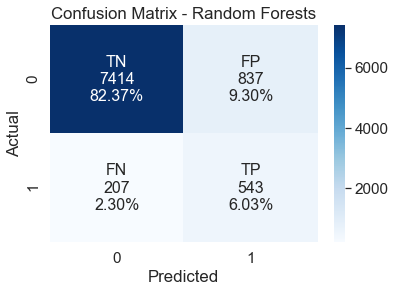

In [90]:
plt.title('Confusion Matrix - Random Forests')
cMatrix(y_test,y_pred_test5)

In [91]:
# Metrics
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred_test5, target_names=target_names))

              precision    recall  f1-score   support

    no churn       0.97      0.90      0.93      8251
       churn       0.39      0.72      0.51       750

    accuracy                           0.88      9001
   macro avg       0.68      0.81      0.72      9001
weighted avg       0.92      0.88      0.90      9001



Sensitivity: 	0.72
Specificity: 	0.9


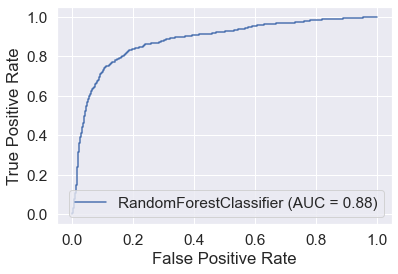

In [92]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_test5, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test5)
roc_auc = auc(fpr, tpr)

plot_roc_curve(rf_best, X_test_pca2, y_test);

> The performance of random forests is similar to that of decision tree. However, there is a considerable improvement in Sensitivity.

## Model 4.2 - Voting Classifier

A simple Voting Classifier is used as the final ensemble model. Basically we will put the predictions of our best performing models to vote. The models chosen are DecisionTreeClassifier, RandomForest and Logistic Regression.

In [93]:
from sklearn.ensemble import VotingClassifier

estimators=[('dtree', dtree_best), ('rf', rf_best), ('log_reg', logsk1)]
ensmble = VotingClassifier(estimators, voting='hard')
ensmble.fit(X_train_pca2, y_tr)

#test our model on the test data
ensmble.score(X_test_pca2, y_test)

0.8892345294967225

In [94]:
# Making predictions
X_test_pca2 = pd.DataFrame(data=X_test_pca2)
y_pred_test6 = ensmble.predict(X_test_pca2)

printCM(y_test,y_pred_test6)

Predicted,0,1
Actual,,
0,7462,789
1,208,542


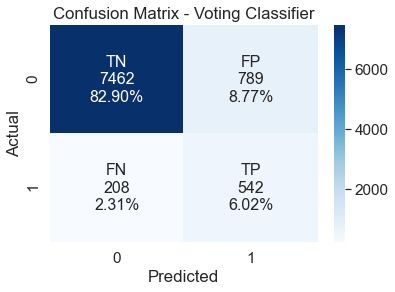

In [95]:
plt.title('Confusion Matrix - Voting Classifier')
cMatrix(y_test,y_pred_test6)

In [96]:
# Metrics
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred_test6, target_names=target_names))

              precision    recall  f1-score   support

    no churn       0.97      0.90      0.94      8251
       churn       0.41      0.72      0.52       750

    accuracy                           0.89      9001
   macro avg       0.69      0.81      0.73      9001
weighted avg       0.93      0.89      0.90      9001



In [165]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_test5, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test6)
roc_auc = auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Sensitivity: 	0.72
Specificity: 	0.9
Area under the curve: 0.8135209469559245


> From all the models built, the voting classifier ensemble gives a holistic performance considering accuracy, precision, recall, sensitivity and specificity. The recall for churn cases is much better than all the other models. However, the precision isn't great.

That said, the performance could be improved further, by trying different ensembles, especially with the raw-data-led decision tree.

## FEATURE IMPORTANCE

> We are using the logistic regression model (without pca) for feature interpretation due to its simplicity.

In [161]:
feature_importance = res.params[1:]
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
sorted_feats = pd.Series(feature_importance[sorted_idx])
sorted_feats

spl_ic_mou_8            -101.51
total_og_mou_7           -61.71
loc_ic_mou_6             -56.42
max_rech_data_7          -54.65
total_rech_amt_8         -48.95
max_rech_data_6          -44.66
av_rech_amt_data_8       -39.15
offnet_mou_7             -25.03
total_og_mou_6           -24.64
total_ic_mou_8           -23.70
loc_ic_t2m_mou_8         -21.80
Recharge_6               -21.07
arpu_diff                -21.03
night_pck_user_7         -20.87
og_others_8              -20.76
Recharge_7               -20.47
total_rech_data_6        -19.66
fb_user_8                -17.13
offnet_mou_8             -15.68
loc_og_t2m_mou_6         -12.78
count_rech_2g_6          -12.46
last_day_rch_amt_8       -11.22
Data_Recharge_6          -11.06
arpu_6                   -10.70
count_rech_2g_8          -10.41
loc_ic_t2t_mou_8         -10.33
total_rech_num_6          -8.65
total_rech_num_diff       -8.26
aon_mon                   -8.10
onnet_mou_6               -8.01
total_og_mou_diff         -8.00
count_re

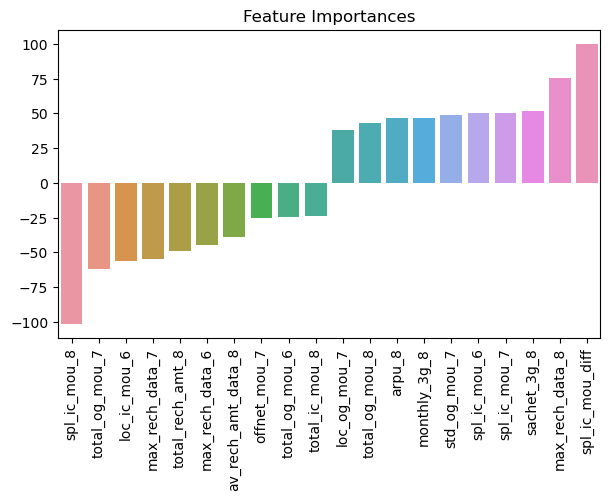

In [163]:
plt.figure(figsize=(7,4))
plt.title('Feature Importances')
plt.xticks(rotation='vertical')

important_feats = pd.concat([sorted_feats[:10] , sorted_feats[-10:]])
sns.barplot(important_feats.index, important_feats.values);

* Top features influencing churn are:
        * spl_ic_mou_diff,
        * max_rech_data_8,
        * sachet_3g_8, 
        * spl_ic_mou_7,
        * spl_ic_mou_6,
        * std_og_mou_7, 
        * monthly_3g_8, 
        * arpu_8,   
        * total_og_mou_8,
        * loc_og_mou_7 
        
* Major variables that doesn't influence churn are :
        * spl_ic_mou_7, 
        * total_og_mou_7,
        * loc_ic_mou_6,  
        * max_rech_data_7,
        * total_rech_amt_8, 
        * max_rech_data_6,
        * av_rech_amt_data_8,
        * offnet_mou_7,
        * total_og_mou_6,
        * total_ic_mou_7       

## PERFORMANCE EVALUATION OF MODELS

| Model                        | Accuracy |  Precision | Recall | f1 | AUC-ROC |
|------------------------------|----------| -----------|--------|----|---------|
| Logistic Regression          |    85    |     92     |   85   | 87 |    84   |
| Logistic Regression(PCA)     |    74    |     92     |   74   | 80 |    31   |
| Logistic Regression(Inc. PCA)|    86    |     92     |   86   | 88 |    87   |
| Decision Tree(Raw Data)      |    94    |     93     |   94   | 93 |    89   |
| Decision Tree                |    85    |     88     |   85   | 86 |    72   |
| Random Forest                |    88    |     92     |   88   | 90 |    88   |
| Voting Classifier            |    89    |     93     |   88   | 90 |    81   |

  * Decision tree model trained on the raw dataset achieves the highest accuracy.
  * Logistic regression scores the best figures of sensitivity. <br>
  * Prima facie a raw decision tree model has best figures overall. However, the sensitivity of the model is dismal. The model metrics with regards to the churned data is below par.  <br>
  * In totality, the ensemble model has much better accuracy, precision, recall than all other models (except the raw decision tree model) and almost similar sensitivity as logistic regression. 

  > Considering the holistic performance, we opt the voting classifier ensemble as the final model. <br>
  Logistic regression model(sans pca) is used for feature interpretation.

The models could be improved further with better feature engineering and hyper-parameter tuning.

## CONCLUSION

> **Major Insights from the analysis**
  * Customers in the tenure range 2 to 3 years are most likely to churn.
  * Some red flags indicating a potential customer churn are:
       * No/Little recharges with maximum utilization of existing packs.
       * Revenue per user dwindles.
  * The internet usage of a customer had a high feature importance. We could easily say that the fate of telecom providers depended heavily on the data packs provided.

> **Measures that could help in customer retention**
   * Ensure quality of data services i.e. faster network and better coverage. Poor network could be a very strong reason for churn given the impact of 'Internet' on churn.
   * Provide small monthly packs/sachets of data-cum-call packs at cheap rates to ensure the customer doesn't fall off the revenue chart. It would be a good idea to provide tailored plans per customer.
   * Provide special discounts/benefits for customers in the 2-3 year tenure bracket.
   * Ensure quality of customer care services. Poor support from the team may discourage customers from continuing the relation.